# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"

<font size="4">Author Reginold K Binoy</font>

## ADVANCED LEVEL TASK

### Task 9 -Handwritten Equation Solver

Handwritten equation solver using CNN :

Mathematical equation solver using character and symbol recognition using image processing and CNN. 

DatasetLink: https://www.kaggle.com/xainano/handwrittenmathsymbols

# Installing Libraries

In [1]:
pip install tensorflow-metal

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow pandas matplotlib scikit-learn kaggle opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 429.9 kB/s eta 0:00:001m354.3 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done


  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105789 sha256=a8c51244024c6d97309e290e0001aa5731e8605a5fdd5a6d230b066ae9357e17
  Stored in directory: /Users/reginoldkbinoy/Library/Caches/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


# Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# Loading and Preprocessing the Dataset

In [4]:
# Load the dataset from local path
dataset_dir = '/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 9/archive/extracted_images/'  # Set your path here

# Image size (You can resize based on the dataset specifics)
IMG_SIZE = 45

# Initialize the data and labels
data = []
labels = []

# Loop over the dataset images
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize image
            data.append(image)
            labels.append(folder)

# Convert data to numpy arrays
data = np.array(data, dtype="float32")
data = np.expand_dims(data, axis=-1)  # Add channel dimension

# Normalize the data
data = data / 255.0

# One-hot encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np.array(labels)

# Split the dataset into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)


# Building the CNN Model

In [6]:
from tensorflow.keras import Input

# Build the CNN model
model = models.Sequential([
    Input(shape=(IMG_SIZE, IMG_SIZE, 1)),  # Use Input layer instead of passing input_shape in Conv2D
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(lb.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Training the Model

In [7]:
# Train the CNN model
EPOCHS = 15  # You can adjust the number of epochs based on performance
BATCH_SIZE = 32

history = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)


Epoch 1/15


2024-09-22 17:21:58.078590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2411/2411 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 0.9151 - loss: 0.2536 - val_accuracy: 0.9836 - val_loss: 0.0522
Epoch 2/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 0.9827 - loss: 0.0624 - val_accuracy: 0.9882 - val_loss: 0.0369
Epoch 3/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.9885 - val_loss: 0.0369
Epoch 4/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.9881 - loss: 0.0413 - val_accuracy: 0.9904 - val_loss: 0.0322
Epoch 5/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.9889 - loss: 0.0362 - val_accuracy: 0.9903 - val_loss: 0.0289
Epoch 6/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 7/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.9939 - val_loss: 0.0215
Epoch 8/15
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 0.9931 - loss: 0.02

# Evaluating the Model

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(testX, testY, verbose=1)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Generate a classification report
predictions = model.predict(testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))


603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9973 - loss: 0.0114
Test accuracy: 99.67%
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           !       1.00      1.00      1.00       260
           (       1.00      1.00      1.00      2931
           )       0.99      1.00      0.99      2845
           +       1.00      1.00      1.00      5029
           ,       0.96      0.89      0.93       367
           -       1.00      1.00      1.00      6811
           0       1.00      1.00      1.00      1043

    accuracy                           1.00     19286
   macro avg       0.99      0.98      0.99     19286
weighted avg       1.00      1.00      1.00     19286



# Visualizing Training Performance

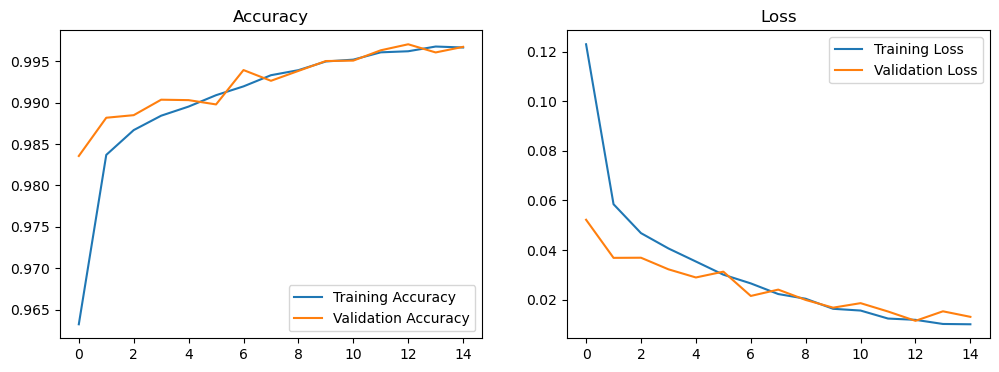

In [9]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Testing with New Data

In [13]:
def recognize_symbol(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    prediction = model.predict(image)
    return lb.classes_[np.argmax(prediction)]

# Example usage
test_image = cv2.imread('/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 9/archive/extracted_images/)/)_1922.jpg', cv2.IMREAD_GRAYSCALE)
recognized_symbol = recognize_symbol(test_image)
print(f"Recognized Symbol: {recognized_symbol}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Recognized Symbol: )


In [14]:
def recognize_symbol(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    prediction = model.predict(image)
    return lb.classes_[np.argmax(prediction)]

# Example usage
test_image = cv2.imread('/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 9/archive/extracted_images/+/+_132.jpg', cv2.IMREAD_GRAYSCALE)
recognized_symbol = recognize_symbol(test_image)
print(f"Recognized Symbol: {recognized_symbol}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Recognized Symbol: +


In [15]:
def recognize_symbol(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    prediction = model.predict(image)
    return lb.classes_[np.argmax(prediction)]

# Example usage
test_image = cv2.imread('/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 9/archive/extracted_images/!/!_20881.jpg', cv2.IMREAD_GRAYSCALE)
recognized_symbol = recognize_symbol(test_image)
print(f"Recognized Symbol: {recognized_symbol}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Recognized Symbol: !


In [16]:
def recognize_symbol(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    prediction = model.predict(image)
    return lb.classes_[np.argmax(prediction)]

# Example usage
test_image = cv2.imread('/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 9/simple.jpg', cv2.IMREAD_GRAYSCALE)
recognized_symbol = recognize_symbol(test_image)
print(f"Recognized Symbol: {recognized_symbol}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Recognized Symbol: +


# Thank You